<a href="https://colab.research.google.com/github/poltorashka22/Data-analysis/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1
1. Первые 10 значений исходной серии:
[1.4967141530112327, 0.8617356988288154, 1.6476885381006925, 2.5230298564080256, 0.765846625276664, 0.7658630430508194, 2.5792128155073915, 1.767434729152909, 0.5305256140650478, 1.5425600435859645]
2. ДОЛЯ В (M-s; M+s) = (0; 2):
Шаг 1: Находим значения в диапазоне:
Найдено значений: 698
Шаг 2: Считаем долю:
Доля = 698 / 1000 = 0.6980
Доля значений в заданом промежутке : 0.6980

3. ДОЛЯ В (M-3s; M+3s) = (-2; 4):
Шаг 1: Находим значения в диапазоне:
Найдено значений: 997
Шаг 2: Считаем долю:
Доля = 997 / 1000 = 0.9970
Доля значений в заданом промежутке : 0.9970

Теория: 0.9973
Разница: |0.9970 - 0.9973| = 0.0003
Реальная доля = 0.9970, теория = 0.9973
Таким образом получениый результат максимально близок к теоритическому

4. КВАДРАТНЫЕ КОРНИ:
root_series = np.sqrt(series)
Шаг 1: Проверяем отрицательные значения:
Отрицательных значений: 147
Примеры отрицательных: [-0.9132802446577979, -0.7249178325130328, -0.012831120334423796]
Шаг 2: Приме

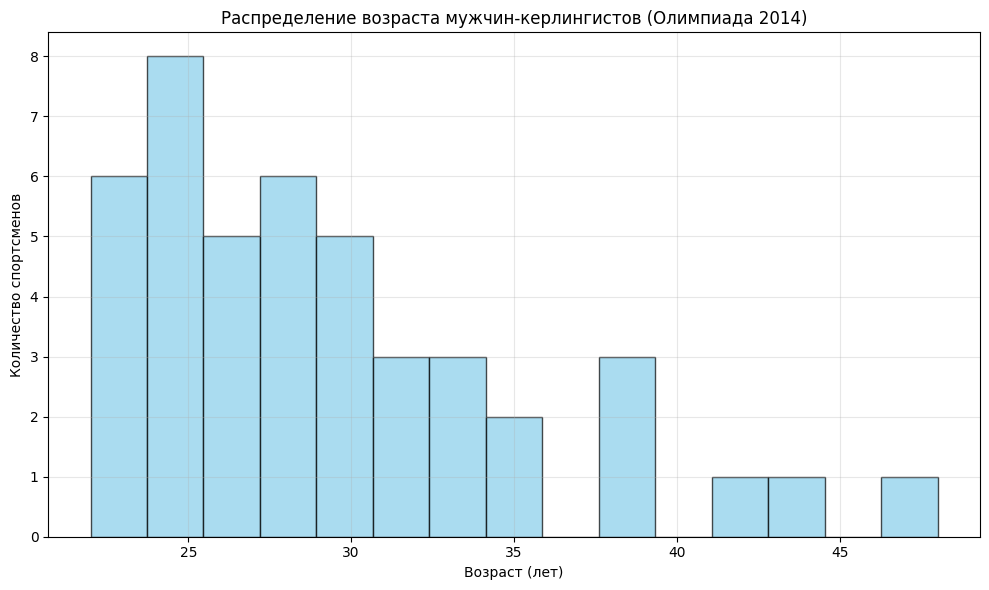


4.7 Страны с медалями на зимней олимпиаде 2006 года
Страны с медалями (первые 10):
     Total_Medals  Average_Age
NOC                           
CAN            69    25.481967
SWE            64    26.791667
GER            54    27.376426
USA            52    25.818462
RUS            41    25.784452
FIN            41    26.614286
AUT            30    27.704545
CZE            27    26.276471
ITA            25    26.727586
NOR            23    28.186335

4.8 Сводная таблица медалей по типам на зимней олимпиаде 2006 года
Сводная таблица медалей по типам (первые 10 стран):
Medal  Bronze  Gold  Silver
NOC                        
AUS         1     1       0
AUT         7    16       7
BLR         0     0       1
BUL         0     0       1
CAN        11    30      28
CHN         6     2       5
CRO         0     1       2
CZE        24     1       2
EST         0     3       0
FIN         7     0      34

ОБЩИЕ ВЫВОДЫ:
• Всего записей в базе данных: 271116
• Средний возраст спортсменов: 25.6

In [20]:
import pandas as pd
import numpy as np
import warnings

print("Задание 1")

# 1. Генерация массива из 1000 значений нормального распределения
np.random.seed(42)
M, s = 1.0, 1.0
array = np.random.normal(M, s, size=1000)

# Преобразование в Series
series = pd.Series(array)
print("1. Первые 10 значений исходной серии:")
print(series.head(10).tolist())

# 2. Доля значений в диапазоне (M-s; M+s) = (0; 2)
print("2. ДОЛЯ В (M-s; M+s) = (0; 2):")
print("Шаг 1: Находим значения в диапазоне:")
within_1std = series[(series > 0) & (series < 2)]
print(f"Найдено значений: {len(within_1std)}")

print("Шаг 2: Считаем долю:")
print(f"Доля = {len(within_1std)} / {len(series)} = {len(within_1std)/len(series):.4f}")
proportion_1std = len(within_1std) / len(series)
print(f"Доля значений в заданом промежутке : {proportion_1std:.4f}")
print()

# 3. Доля значений в диапазоне (M-3s; M+3s) = (-2; 4)
print("3. ДОЛЯ В (M-3s; M+3s) = (-2; 4):")
print("Шаг 1: Находим значения в диапазоне:")
within_3std = series[(series > -2) & (series < 4)]
print(f"Найдено значений: {len(within_3std)}")

print("Шаг 2: Считаем долю:")
print(f"Доля = {len(within_3std)} / {len(series)} = {len(within_3std)/len(series):.4f}")
proportion_3std = len(within_3std) / len(series)
print(f"Доля значений в заданом промежутке : {proportion_3std:.4f}")
print()

# Теоретическое значение
theoretical_3std = 0.9973
difference = abs(proportion_3std - theoretical_3std)
print(f"Теория: {theoretical_3std:.4f}")
print(f"Разница: |{proportion_3std:.4f} - {theoretical_3std:.4f}| = {difference:.4f}")
print(f"Реальная доля = {proportion_3std:.4f}, теория = {theoretical_3std:.4f}")
print("Таким образом получениый результат максимально близок к теоритическому")
print()

# 4. Замена каждого значения на квадратный корень
print("4. КВАДРАТНЫЕ КОРНИ:")
print("root_series = np.sqrt(series)")
print("Шаг 1: Проверяем отрицательные значения:")
negative_mask = series < 0
negative_count = negative_mask.sum()
print(f"Отрицательных значений: {negative_count}")
if negative_count > 0:
  print(f"Примеры отрицательных: {series[negative_mask].head(3).tolist()}")

print("Шаг 2: Применяем корень (для отрицательных → NaN):")
with warnings.catch_warnings(record=True) as w:
  warnings.simplefilter("always")
  root_series = pd.Series(np.sqrt(series))
  if w:
    print(f"Предупреждение: {w[0].message}")

print(f"Пример корней: {root_series.head().tolist()}")
print(f"ОТВЕТ: {negative_count} значений дали NaN")
print("Предупреждение возникает, потому что мы пытаемся вычислить квадратный корень из отрицательного числа, а это математически невозможно")
print()

# 5. Среднее арифметическое (без учета NaN)
print("5. СРЕДНЕЕ АРИФМЕТИЧЕСКОЕ:")
print("Шаг 1: Игнорируем NaN (автоматически в pandas):")
nan_count = root_series.isna().sum()
valid_count = len(root_series) - nan_count
print(f"Всего значений: {len(root_series)}, NaN: {nan_count}, валидных: {valid_count}")

print("Шаг 2: Считаем среднее:")
mean_root = root_series.mean()
print(f"mean = root_series.mean() = {mean_root:.4f}")
print(f"Среднее арифметическое: {mean_root:.4f}")
print()

# 6. Создание DataFrame с двумя столбцами
print("6. СОЗДАНИЕ DATAFRAME:")
print("df = pd.DataFrame({'number': series, 'root': root_series})")
df = pd.DataFrame({'number': series, 'root': root_series})
print("Столбцы: 'number' (исходные), 'root' (корни)")
print("Первые 6 строк:")
print(df.head(6).to_string(index=False))
print()

# 7. Поиск записей с корнем в диапазоне от 1.8 до 1.9
print("7. ПОИСК root ОТ 1.8 ДО 1.9:")
print("query_result = df.query('1.8 <= root <= 1.9')")
query_result = df.query('1.8 <= root <= 1.9')
print(f"Найдено записей: {len(query_result)}")

if len(query_result) > 0:
  print("Найденные записи:")
  print(query_result.to_string(index=False))
  print("Проверка: корень из каких чисел дает 1.8-1.9?")
  print(f"Это числа от {1.8**2:.2f} до {1.9**2:.2f}")
else:
  print("Записи не найдены")

print("-" * 40)

print("Задание 2")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 Загрузка данных из файла
df = pd.read_csv('athlete_events.csv')
# Просмотр первых строк данных
print("Первые 5 строк данных:")
print(df.head())
print("\nРазмерность данных:", df.shape)
print(f"Количество строк: {df.shape[0]}, количество столбцов: {df.shape[1]}")

# 2. Определение количества значений каждого признака
print("\n2.Пропущенные данные")
missing_data = df.isnull().sum()
max_missing = missing_data.idxmax()
print(f"Больше всего пропусков в столбце: '{max_missing}' ({missing_data[max_missing]} пропусков)")

# 3. Статистическая информация по числовым признакам
print("\n3. Информация")
stats = df[['Age', 'Height', 'Weight']].describe()
print(stats)

# 4. Ответы на вопросы
print("\n4.1 Самый молодой участник 1992 года")
youngest_1992 = df[df['Year'] == 1992].nsmallest(1, 'Age')[['Name', 'Age', 'Event']]
print(f"Имя: {youngest_1992['Name'].values[0]}")
print(f"Возраст: {youngest_1992['Age'].values[0]} лет")
print(f"Дисциплина: {youngest_1992['Event'].values[0]}")

print("\n4.2 Список всех видов спорта")
sports = sorted(df['Sport'].unique())
print(f"Всего видов спорта: {len(sports)}")
print("\nСписок всех видов спорта:")
for i, sport in enumerate(sports, 1):
    print(f"{i:2d}. {sport}")

print("\n4.3 Средний рост теннисисток 2000 года")
tennis_2000 = df[(df['Year'] == 2000) & (df['Sport'] == 'Tennis') & (df['Sex'] == 'F')]
avg_height = tennis_2000['Height'].mean()
print(f"Средний рост теннисисток 2000 года: {avg_height:.2f} см")

print("\n4.4 Золотые медали Китая в настольном теннисе 2008 года")
china_tt_2008 = df[(df['Year'] == 2008) & (df['Team'] == 'China') &
                   (df['Sport'] == 'Table Tennis') & (df['Medal'] == 'Gold')]
gold_medals = len(china_tt_2008)
print(f"Золотых медалей Китая в настольном теннисе 2008 года: {gold_medals}")

print("\n4.5 Изменение количества видов спорта")
sports_2004 = df[(df['Year'] == 2004) & (df['Season'] == 'Summer')]['Sport'].nunique()
sports_1988 = df[(df['Year'] == 1988) & (df['Season'] == 'Summer')]['Sport'].nunique()
change = sports_2004 - sports_1988
print(f"1988 год: {sports_1988} видов спорта")
print(f"2004 год: {sports_2004} видов спорта")
print(f"Изменение: {change:+d} видов")

print("\n4.6 Гистограмма возраста керлингистов 2014 года")
curling_2014 = df[(df['Year'] == 2014) & (df['Sport'] == 'Curling') & (df['Sex'] == 'M')]
ages = curling_2014['Age'].dropna()
print(f"Количество керлингистов для анализа: {len(ages)}")

plt.figure(figsize=(10, 6))
plt.hist(ages, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Распределение возраста мужчин-керлингистов (Олимпиада 2014)')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество спортсменов')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n4.7 Страны с медалями на зимней олимпиаде 2006 года")

winter_2006 = df[(df['Year'] == 2006) & (df['Season'] == 'Winter')]

medals_by_country = winter_2006.groupby('NOC').agg({
    'Medal': lambda x: x.notna().sum(),  # Количество медалей (любых)
    'Age': 'mean'
}).rename(columns={'Medal': 'Total_Medals', 'Age': 'Average_Age'})

# Фильтрация стран с хотя бы одной медалью
countries_with_medals = medals_by_country[medals_by_country['Total_Medals'] > 0]
print("Страны с медалями (первые 10):")
print(countries_with_medals.sort_values('Total_Medals', ascending=False).head(10))

print("\n4.8 Сводная таблица медалей по типам на зимней олимпиаде 2006 года")

# Фильтруем только записи с медалями
medals_data = winter_2006[winter_2006['Medal'].notna()]

# Создаем сводную таблицу
pivot_table = pd.pivot_table(
    medals_data,
    index='NOC',
    columns='Medal',
    values='ID',
    aggfunc='count',
    fill_value=0
)

print("Сводная таблица медалей по типам (первые 10 стран):")
print(pivot_table.head(10))

print("\n" + "="*60)
print("ОБЩИЕ ВЫВОДЫ:")
print("="*60)
print(f"• Всего записей в базе данных: {df.shape[0]}")
print(f"• Средний возраст спортсменов: {df['Age'].mean():.1f} лет")
print(f"• Средний рост спортсменов: {df['Height'].mean():.1f} см")
print(f"• Средний вес спортсменов: {df['Weight'].mean():.1f} кг")
print(f"• Количество уникальных видов спорта: {len(sports)}")
print(f"• Самый молодой участник 1992 года: {youngest_1992['Age'].values[0]} лет")
print(f"• Китай выиграл {gold_medals} золотых медалей в настольном теннисе в 2008")
print(f"• Количество видов спорта увеличилось на {change} с 1988 по 2004 год")



print("-" * 40)

print("Задание 3")

import pandas as pd
import numpy as np

# Загрузка данных из файла
df = pd.read_csv('telecom_churn.csv')

# 1. Общая информация о датафрейме
print("\n1. Обзая информация")

print("Информация о датафрейме:")
print(f"Размер данных: {df.shape[0]} строк, {df.shape[1]} столбцов")
print("\nТипы данных:")
print(df.dtypes)

print("\nПропущенные значения:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
  print("Отсутствующих данных нет")
else:
  print(missing_values[missing_values > 0])

# 2. Количество активных и потерянных клиентов
print("2. Определение сколько клиентов активно, а сколько потеряно")
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
print(f"Активных клиентов (False): {churn_counts[False]} ({churn_percentages[False]:.2f}%)")
print(f"Потерянных клиентов (True): {churn_counts[True]} ({churn_percentages[True]:.2f}%)")

# 3. Средняя продолжительность звонка
print("3. Средняя продолжительность одного звонка")
df['Average call duration'] = (df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes']) / (df['Total day calls'] + df['Total eve calls'] + df['Total night calls'])
print("Топ-10 клиентов с наибольшей средней продолжительностью звонка:")
top_10 = df.sort_values('Average call duration', ascending=False).head(10)
print(top_10[['State', 'Average call duration', 'Churn']].to_string(index=False))

# 4. Сравнение средней продолжительности звонка по группам оттока
print("4. Сравнение продолжительности звонка на основе группы оттока")
churn_avg_duration = df.groupby('Churn')['Average call duration'].mean()
print(f"Средняя продолжительность звонка у активных клиентов: {churn_avg_duration[False]:.2f} минут")
print(f"Средняя продолжительность звонка у потерянных клиентов: {churn_avg_duration[True]:.2f} минут")
difference = abs(churn_avg_duration[False] - churn_avg_duration[True])
if difference > 1.0:
  print(f"Разница существенная: {difference:.2f} минут")
else:
  print(f"Разница не существенная: {difference:.2f} минут")

 # 5. Сравнение количества звонков в службу поддержки
print("5. Сравнение кол-ва звонков в службу поддержки")
churn_service_calls = df.groupby('Churn')['Customer service calls'].mean()
print(f"Среднее количество звонков в поддержку у активных клиентов: {churn_service_calls[False]:.2f}")
print(f"Среднее количество звонков в поддержку у потерянных клиентов: {churn_service_calls[True]:.2f}")
service_diff = abs(churn_service_calls[False] - churn_service_calls[True])
if service_diff > 0.5:
  print(f"Разница существенная: {service_diff:.2f} звонков")
else:
  print(f"Разница не существенная: {service_diff:.2f} звонков")

# 6. Анализ связи между оттоком и звонками в поддержку
print("6. Анализ связи между оттоком и звонками в поддержку")
contingency_table = pd.crosstab(df['Customer service calls'], df['Churn'], normalize='index') * 100
contingency_table_counts = pd.crosstab(df['Customer service calls'], df['Churn'])
print("Таблица сопряженности (проценты по строкам):")
print(contingency_table.round(2))
# Определение порога с оттоком > 40%
high_churn_calls = contingency_table[contingency_table[True] > 40]
overall_churn_rate = churn_percentages[True]
print(f"\nОбщий процент оттока по всем клиентам: {overall_churn_rate:.2f}%")
if not high_churn_calls.empty:
  threshold = high_churn_calls.index.min()
  print(f"Порог, при котором процент оттока становится > 40%: {threshold} звонков в службу поддержки")
  print(f"Количество звонков с оттоком > 40%: {high_churn_calls.index.tolist()}")
else:
  print("Нет количества звонков с оттоком > 40%")

# 7. Анализ связи между оттоком и международным роумингом
print("7. Анализ связи между оттоком и международным роумингом")
international_churn = pd.crosstab(df['International plan'], df['Churn'], normalize='index') * 100
international_counts = pd.crosstab(df['International plan'], df['Churn'])
print("Распределение оттока по наличию международного роуминга:")
print(international_churn.round(2))

print("\nАбсолютные значения:")
print(international_counts)
no_plan_churn = international_churn.loc['No', True]
yes_plan_churn = international_churn.loc['Yes', True]

print(f"\nОтток среди клиентов БЕЗ международного роуминга: {no_plan_churn:.2f}%")
print(f"Отток среди клиентов С международным роумингом: {yes_plan_churn:.2f}%")

if yes_plan_churn > no_plan_churn + 10:
  print("ВЫВОД: Процент оттока среди клиентов с международным роумингом СУЩЕСТВЕННО ВЫШЕ")
elif yes_plan_churn < no_plan_churn - 10:
  print("ВЫВОД: Процент оттока среди клиентов с международным роумингом СУЩЕСТВЕННО НИЖЕ")
else:
  print("ВЫВОД: Существенной разницы в проценте оттока не наблюдается")

# 8. Прогнозирование оттока и оценка ошибок
print("8. Прогнозирование оттока и оценка ошибо")
# Определяем порог для прогноза (используем найденный ранее или 4 по умолчанию)
prediction_threshold = high_churn_calls.index.min() if not high_churn_calls.empty else 4
df['Predicted Churn'] = ((df['Customer service calls'] >= prediction_threshold) | (df['International plan'] == 'Yes'))
# Создание матрицы ошибок
confusion_matrix = pd.crosstab(df['Churn'], df['Predicted Churn'],
                                rownames=['Фактический отток'],
                                colnames=['Прогнозируемый отток'])

print("Матрица ошибок:")
print(confusion_matrix)
print("\nУсловные обозначения:")
print("False False - Истинно отрицательные (правильно предсказан активный клиент)")
print("False True  - Ложноположительные (ошибочно предсказан отток)")
print("True False  - Ложноотрицательные (пропущен отток)")
print("True True   - Истинно положительные (правильно предсказан отток)")

# Расчет метрик
TN = confusion_matrix.iloc[0,0]  # True Negative
FP = confusion_matrix.iloc[0,1]  # False Positive
FN = confusion_matrix.iloc[1,0]  # False Negative
TP = confusion_matrix.iloc[1,1]  # True Positive

total = TN + FP + FN + TP

false_positive_rate = (FP / (FP + TN)) * 100 if (FP + TN) > 0 else 0
false_negative_rate = (FN / (FN + TP)) * 100 if (FN + TP) > 0 else 0
accuracy = ((TP + TN) / total) * 100

print(f"\nМЕТРИКИ КАЧЕСТВА ПРОГНОЗА:")
print(f"Общая точность: {accuracy:.2f}%")
print(f"Ложноположительные срабатывания (False Positive Rate): {false_positive_rate:.2f}%")
print(f"Ложноотрицательные срабатывания (False Negative Rate): {false_negative_rate:.2f}%")

print(f"\nПравила прогноза:")
print(f"- Прогнозируем отток, если: количество звонков в поддержку >= {prediction_threshold} ИЛИ подключен международный роуминг")